# Visualize the nueral network

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os

import numpy as np
import pandas as pd

from csrank.callbacks import DebugOutput
from csrank.constants import OBJECT_RANKING
from csrank.fate_ranking import FATEObjectRanker
from csrank.util import rename_file_if_exist, configure_logging_numpy_keras, get_tensor_value, create_dir_recursively, tensorify,scores_to_rankings
from keras.utils import plot_model
from keras import backend as K
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import pandas as pd
from csrank.losses import *
from csrank.metrics import *
from csrank.dataset_reader import SyntheticDatasetGenerator
from sklearn.utils import check_random_state
from collections import OrderedDict

Using TensorFlow backend.


## Defining constants for the experiments

Initializing the variables for the experiment. Configuring the keras and tensorflow. Defining the parameters for dataset reader.

In [2]:
SUB_FOLDER = "gr_vis"
log_path = os.path.join(os.getcwd(), SUB_FOLDER, "gr.log")
create_dir_recursively(log_path, is_file_path=True)
logger = configure_logging_numpy_keras(seed=42, log_path=log_path)

Generate the medoid dataset for evaluating the model

In [3]:
n_objects = 5
n_features = 2
n_train_instances = 100
n_test_instances = 6
random_state = check_random_state(42)
params = {'n_train_instances': n_train_instances, 
          'n_test_instances': n_test_instances, 
          'n_features': n_features,
          'n_objects': n_objects,
          'random_state': random_state}
or_generator = SyntheticDatasetGenerator(**params)
X_train, Y_train, X_test, Y_test = or_generator.get_single_train_test_split() 
n_instances, n_objects, n_features = X_train.shape

Define the parameters for the FATEObjectRanker

In [4]:
epochs = 5
n_hidden_joint_units = 5
n_hidden_set_units = 7
n_hidden_joint_layers = 1
n_hidden_set_layers = 1
ranker_params = {"n_objects": n_objects, 
                 "n_object_features": n_features,
                 "n_hidden_joint_layers" : n_hidden_joint_layers,
                 "n_hidden_set_layers" : n_hidden_set_layers,
                 "n_hidden_set_units" : n_hidden_set_units,
                 "n_hidden_joint_units" : n_hidden_joint_units,
                 "use_early_stopping": True}
logger.info("n_hidden_joint_units {} and  n_hidden_set_units {}".format(n_hidden_joint_units, n_hidden_set_units))
logger.info("############################# With set layers ##############################")

Create the model and fit the ranker on it to to check the visualization

In [5]:
gor = FATEObjectRanker(**ranker_params)
gor.fit(X_train, Y_train, epochs=epochs)

Create the complete model and visualize it

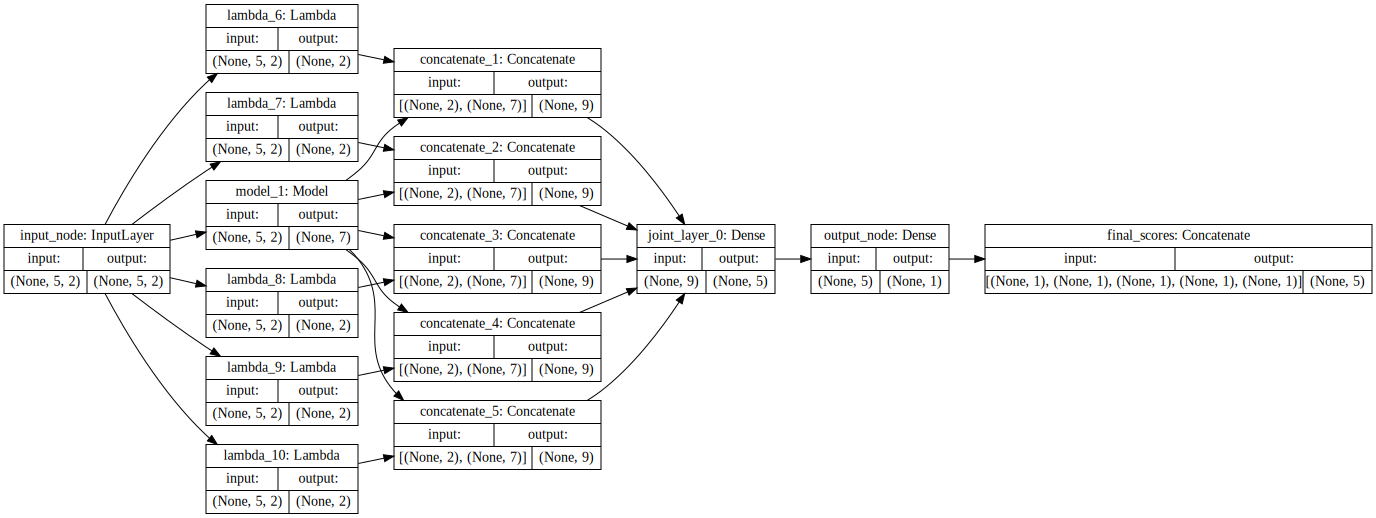

In [6]:
SVG(model_to_dot(gor.model, show_shapes=True,
                 rankdir='LR').create(prog='dot', format='svg'))

To store the model into a .png file

In [ ]:
model_path = os.path.join(os.getcwd(), SUB_FOLDER, "completeModel.png")
plot_model(plot_model(gor.model,to_file=model_path,show_shapes=True, rankdir='LR'))